# 202.01.07

# 미분

In [ ]:
# 미분 : 
# 분산 : (sigma(관측치 - 평균)^2) / n -1
# 표준편차 : root(sigma(관측치 - 평균)^2) / n-1      <- root check
# 공분산 : sigma (x-xbar)(y-ybar) / n-1
# 상관계수 : (sigma(x-xbar)(y-ybar)/n-1) / (xsigma * ysigma)   : -1 ~ 1
# 벡터의 거리값 : 각 요서의 차의 제곱을 루트로 구함
# model 평가 : MSE( mean square error ) : 연속된수치인 경우이 평가
#            : RMSE (root)
# 신경망에서 cost function 비용함수 : (예측치 - 관측치) => back porpagation(역전파를 통해서 가중치를 수정)

# 국어, 수학 점수 vector 상관계수가 높다 (연관이 높다) = 내적이 1이다 (차가 없다)   <- 같은 값이므로 구하기 쉬운 내적으로 구한다

# 회귀분석

In [ ]:
# 회귀분석, 상관분석

- 회귀분석 다중공선성 : 종속변수가 과하게 영향을 받을 수 있음 
- 회귀분석 자기상관성(autocorrelation)이 존재 : => 시계열 분석   ( 오늘 데이터가 내일 영향을 미치고, 그 다음에도 미치고 이런식)
- 시계열 분석 ARMA (Autocoreiation + Moving Average)
        -> 이동평균법(주파수를 줄여줌 => 복잡하면 분석 불가)
        -> 정상성을 띈데이터에만 가능
- 비정상성 -> 정상성 (으로 바꿔줌)
- ARIMA (Integrated 통합  = > 비정상성을 띈 데이터에도 가능 )
- pandas 는 시계열 분석을 지원 ( 시간 index를 지원 )        

In [2]:
import numpy as np
from statistics import *
x = np.array([7,8,9])
y = np.array([9,10,20])   # <- 20이 아니라 11이면 더 높은 상관계수가 나온다
print(y.mean())   # 통계에서는 중위수 (medians)를 사용한다. 왜? 이상치의 영향을 받지 않아서 
# 공분산 행렬
print("공분산", np.cov(x,y))
# 상관계수 행렬(열2, 행2 : 4)
print("상관계수", np.corrcoef(x,y))
    
# 1~4 사분위로 각 구간마다의 공분산 & 상관계수를 나타낸다

13.0
공분산 [[ 1.   5.5]
 [ 5.5 37. ]]
상관계수 [[1.         0.90419443]
 [0.90419443 1.        ]]


# 공분산(covariance) : 상관정도를 나타내는 값
  2개의 변수중 하나의 값이 상승하는 경향을 보일 때, 다른 값도 상승하는 경향의 상관관계에 있다면, 공분산의 값은 양수가 될 것이다. 
  반대로 2개의 변수중 하나의 값이 상승하는 경향을 보일 때, 다른 값이 하강하는 경향을 보인다면 공분산의 값은 음수가 된다. 
       => 즉, 음의 관계냐 양의 관계냐 

# 상관계수( correlation coefficient)
   그 관계의 강도까지 표현
   1. 상관계수는 단위와 관계가 없다!!!! <- 주된 필요이유
   2. 상관계수는 -1~1 까지의 값을 갖는다 (0 은 별로 관계 없다는 뜻) 
   3. 두 변수를 서로 바꿔도 상관계수의 값은 똑같다. 
   
   https://m.blog.naver.com/PostView.nhn?blogId=lodastatin&logNo=80116178535&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [235]:
import numpy as np
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본")
print(arr);print()
print("누적합(행방향 <- 세로) ")
print(arr.cumsum(0));print()
print("누적곱(열 방향 <- 가로) ")
print(arr.cumprod(1));print()
print("배열의 합계(모든값들 더하기) ")
print(arr.sum());print()
print("열방향으로의 행평균")    # 열방향(좌우)
print(arr.mean(axis=1));print()# 행방향과 열방향의 구분
print("행방향으로의 합계")    # 행방향(세로가로)
print(arr.sum(0))# 열별 합계

원본
[[1 2 3]
 [4 5 6]
 [7 8 9]]

누적합(행방향 <- 세로) 
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]

누적곱(열 방향 <- 가로) 
[[  1   2   6]
 [  4  20 120]
 [  7  56 504]]

배열의 합계(모든값들 더하기) 
45

열방향으로의 행평균
[2. 5. 8.]

행방향으로의 합계
[12 15 18]


In [239]:
# 가중치( 변수 중요도를 부여 ) 를 부여한다는 의미 : 
a = np.array([1,2,3,4])
wts = np.array([4,3,2,1])
print(np.average(a,weights = wts))
std = np.sqrt(np.mean(abs(a - a.mean())**2))
print(np.var([1,2,3,4]))  # 분산
print(np.std([1,2,3,4]))  # 표준편차

2.0
1.25
1.118033988749895


# 분산(distribution) : 데이터의 분포가 평균으로부터 얼마나 산포되었 있는지 ( 떨어져 있는지)
# 표준편차(standard deviation) : 분산에 제곱근을 붙인 값

# 표준편차를 제곱해준 값이 분산 값

분산은 편차에 제곱을 하여 계산을 하였기 때문에, 실제  값에서 너무 멀어져 있다. 그래서 실제 값으로 근접 시키기 위해서 제곱근(루트)를 씌워준 것이다. (분산에서 제곱했으니, 반대로 제곱근을 씌운다.)

즉 분산에 루트를 씌운것이 표준 편차(Standard deviation) 이며, 이 표준편차는 평균으로 부터 원래 데이타에 대한 오차범위의 근사값이다.



출처: https://bcho.tistory.com/972 

# matplotlib

In [ ]:
# matplotlib, seaborn , pandas.plot
- matplotlib로 구성
- %matplotlib inline  을 사용해야 출력

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


<function matplotlib.pyplot.show(*args, **kw)>

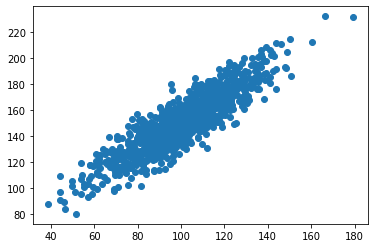

In [16]:
%matplotlib inline
from numpy import mean   # 메모리 낭비를 절감
from numpy import std     
from numpy.random import randn   # 서브 패키지 : linalg, random, fft( 푸리에 변환), poly(다차원)
from numpy.random import seed   # random : 의사난수(데이터 출력순서 정해짐)
from matplotlib import pyplot
seed(1)  # 랜덤이지만 같은 수가 발생

data1 = 20 * randn(1000) + 100    # randn : 정규분포. 여기서 1000개를 나오게해라, // + 100 은 절편
data2 = data1 + (10 * randn(1000) + 50)

print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
pyplot.scatter(data1, data2)   # 산포도 
pyplot.show()

#  data1 = 20 * randn(1000) + 100     <-   y=ax +b 처럼 식을 만들어준다 / +100 은 절편
# data2 = data1 + (10 * randn(1000) + 50)    <-    data1 과 겹치지만 다른 데이터를 만들려고 만듬. 

# numpy 의 np.random
- np.random.randint : 균일 분포의 정수 난수 1개 생성.
- np.random.rand : 0부터 1사이의 균일 분포에서 난수 matrix array 생성.
- np.random.randn : 가우시안 표준 정규 분포에서 난수 matrix array 생성    

https://nittaku.tistory.com/443

In [19]:
import matplotlib.pyplot as plt
print(pft.style.available)   # 스타일이 뭐있는지 확인하기

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


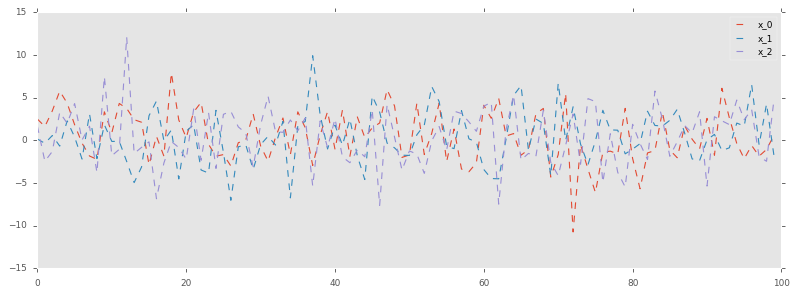

In [71]:
plt.style.use(['seaborn-paper'])
xs = np.random.normal(0,3,(100,3))  # 평균 = 0, 표준편차 : 3, 100X3 데이터 생성  /// normal 은 randn와 다르게 내가 지정할수 있다
plt.figure(figsize = (12,4))  # 모양을 결정
for i in range(0,3):
    x = xs[:,i]
    plt.plot(range(0,len(x)),x,linewidth=1, linestyle = '--', label ='x_{}'.format(i))
plt.legend()   #legend는 범례   # len 불러오는 숫자, 
plt.grid(False)
plt.show()

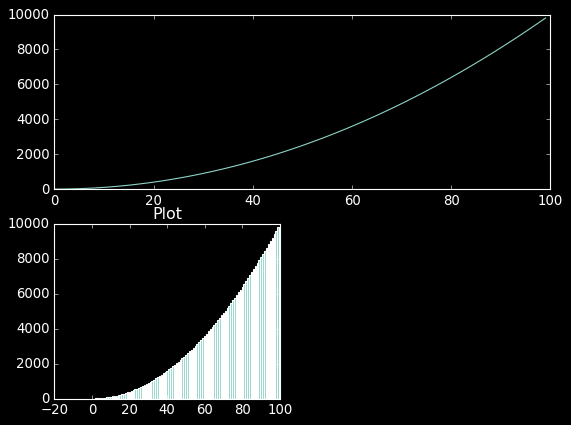

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)  # 2행 1열
ax2 = fig.add_subplot(2,2,3)  # 3 은 순서

# 데이터 만들기
x = range(0,100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)   # 막대그래프
plt.title("Plot")
plt.show()

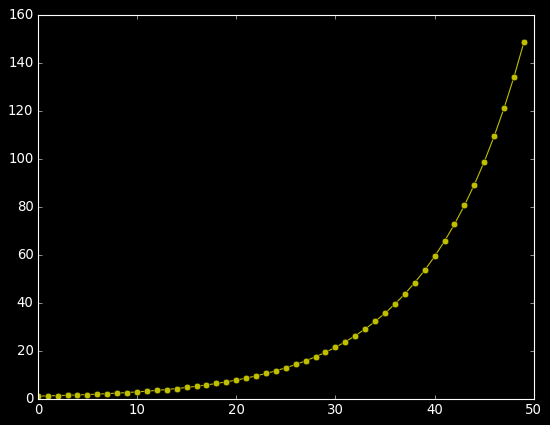

In [40]:
x1 = np.linspace(0.0,5.0)
x2 = np.linspace(0.0,2.0)
    
plt.plot(np.exp(x1), 'yo-') # 지수함수의 그래프
plt.show()

AxesSubplot(0.125,0.536364;0.775x0.363636)
AxesSubplot(0.125,0.1;0.775x0.363636)


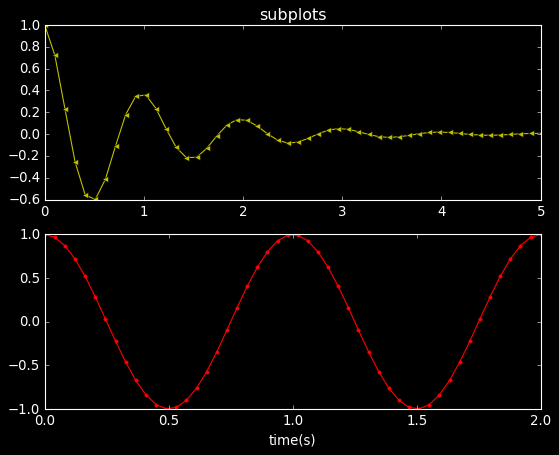

In [44]:
y1 = np.cos(2*np.pi * x1)*np.exp(-x1)  # -라서 점점 낮아진다. (exp) 주기적이라서
y2 = np.cos(2*np.pi * x2)

ax1 = plt.subplot(2,1,1)
plt.plot(x1,y1,'y<-') # y는 yellow, < 는 점 모양
plt.title("subplots")
print(ax1)
ax2 = plt.subplot(2,1,2)
plt.plot(x2,y2,'r.-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

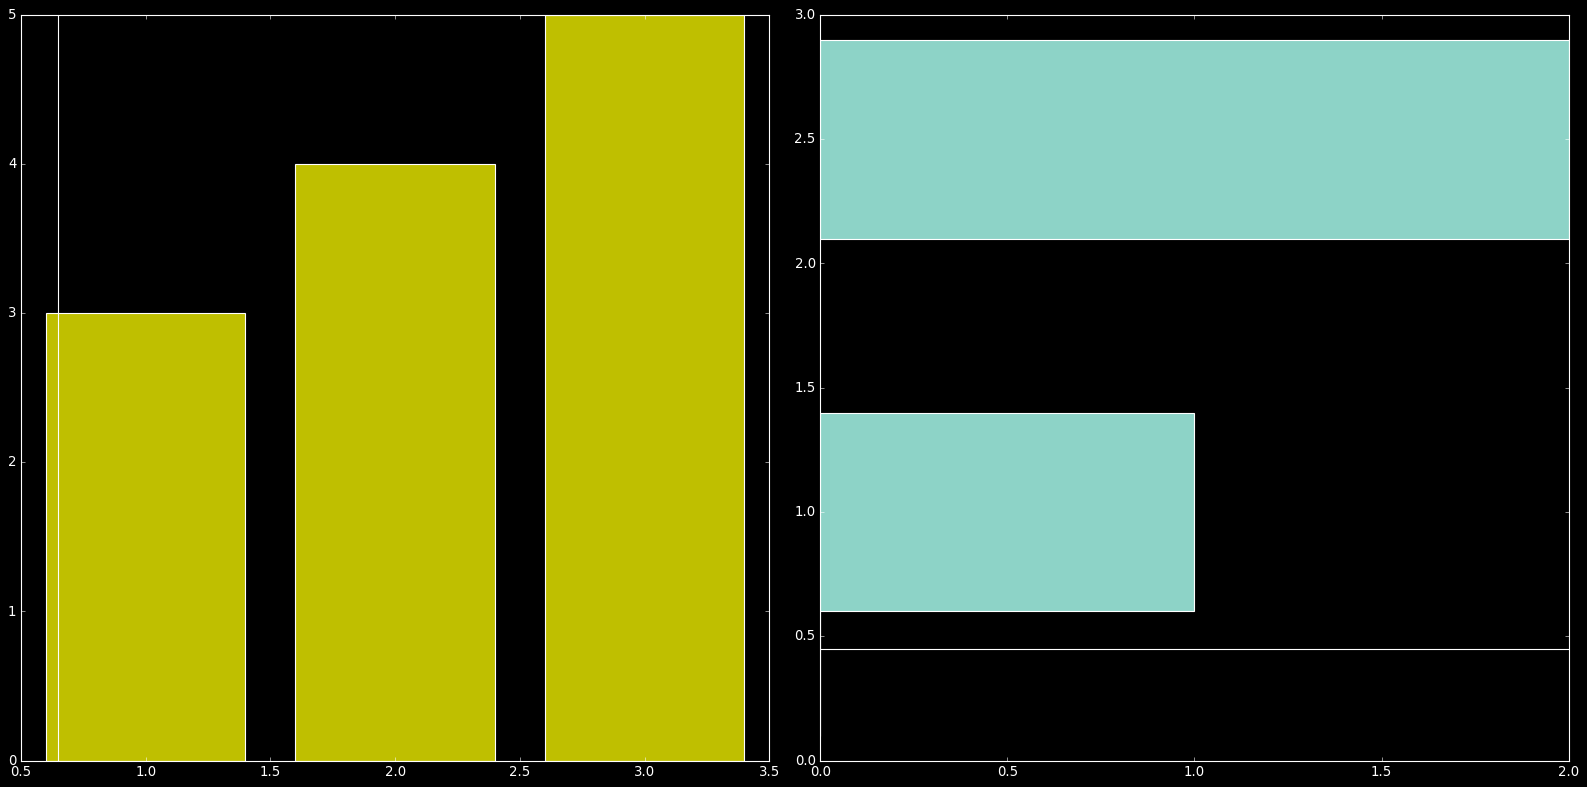

In [46]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# 이산형 막대그래프 bar, 연속그래프 histogram
ax1.bar([1,2,3],[3,4,5], color = 'y')
ax2.barh([0.5,1,2.5],[0,1,2])    # v = vertical(수직), h = horizontal(수평)
ax1.axvline(0.65)
ax2.axhline(0.45)
plt.tight_layout()
plt.show()

# boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x2f2e9485848>,
 'caps': [<matplotlib.lines.Line2D at 0x2f2e9485308>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f2e9485fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2f2e8f2f688>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f2e98d0088>],
 'means': []}

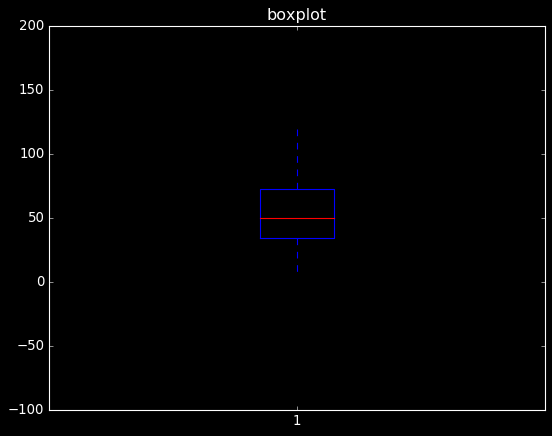

In [50]:
# boxplot
# IQR ( inter quantile range = 3 사분위수 - 1사분위수)
# IQR * +-1.5 : 상하한선
np.random.seed(19680801)
spread = np.random.rand(50)*100   # 분포
center = np.ones(25) * 50        # 중심 데이터
flier_high = np.random.rand(10) * 100 + 100   # 상한선을 넘는데이터
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))   # 데이터를 병합
fig1, ax1 = plt.subplots()  # 형태를 제어, 도화지(ax1)
ax1.set_title('boxplot')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f2e8cffd88>,
 'caps': [<matplotlib.lines.Line2D at 0x2f2e7a94048>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f2e7989c48>],
 'medians': [<matplotlib.lines.Line2D at 0x2f2e8e2dc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f2e8d11648>],
 'means': []}

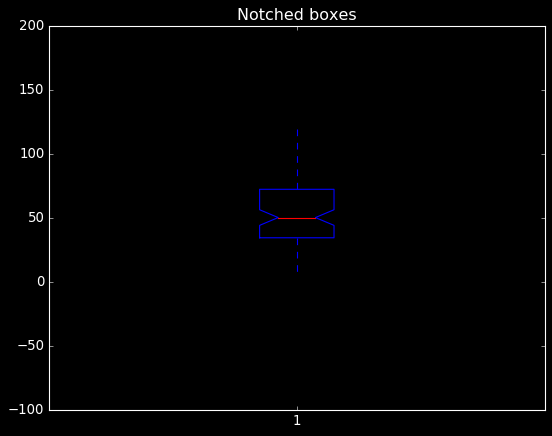

In [53]:
# 95% 신뢰구간 (notch)
fig,ax2 = plt.subplots()
ax2.set_title('Notched boxes')
ax2.boxplot(data,notch = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f2ea9a3f88>,
 'caps': [<matplotlib.lines.Line2D at 0x2f2e9899fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f2ea9a3d88>],
 'medians': [<matplotlib.lines.Line2D at 0x2f2e9818d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f2e98185c8>],
 'means': []}

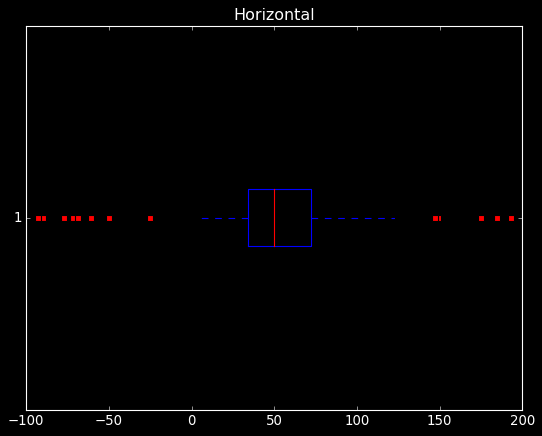

In [55]:
# 이상치 보는거 ( flier)
red_square = dict(markerfacecolor = 'r', marker='s')  # 마커는 square로 해라
fig5,ax5 = plt.subplots()
ax5.set_title('Horizontal')
ax5.boxplot(data, vert = False, flierprops = red_square)  # vert = F 는 수직으로 하지마라( = 수평으로)


# meshgrid
# -  imshow

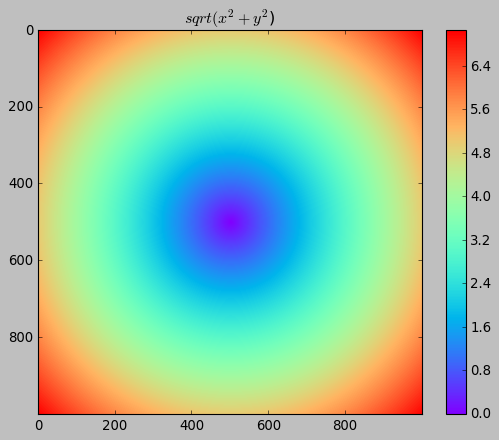

In [58]:
# meshgrid r그물망 격자
# 그래프에 수식 : latex 문법 
points = np.arange(-5, 5, 0.01)  # 0.01 = 1000개  (-5에서 5까지)
xs, ys = np.meshgrid(points, points)   # 좌우가 천개 (points, points)
z = np.sqrt(xs**2 + ys**2)   # 거리값 /

# 팔레트 : plt.cm.rainbow
plt.imshow(z, cmap = plt.cm.rainbow)  # 데이터를 이미지로 출력 (높이값을 컬러로) !!!!!! <- "imshow" 가 중요**
plt.colorbar()   # 컬러별 수의 크기값을 출력

plt.title('$sqrt(x^2 + y^2}$)')  # latex 문법
plt.show()

# sqrt(x^2 + y^2)
# 원점에서 거리값의 따라 구간이 지정되어서 , 원의 모양으로 색이 달라짐

# 높이값을 이미지 컬러값으로
# 이미지 하나를 = 픽셀(rgb-빨초파):하나의 네모모양 //  rgb가 다 모이면 하양, 다 없으면 검정
# 결국 이미지도 숫자

In [ ]:
# CNN(conversion)

# 3차원 : Axes3D

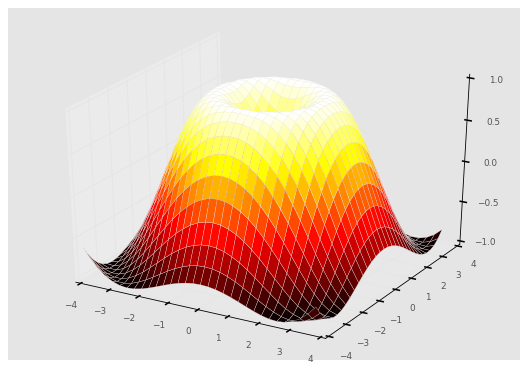

<function matplotlib.pyplot.show(*args, **kw)>

In [72]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)    # 3차원 출력 도화지
X = np.arange(-4,4,0.25)    # 중앙이 0.0 거기에 +-4
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)  # 좌표점 -4, -3.75, -3.5
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)   # sin은 주기가 있기 때문에 모자(?) 모양
#Z = (R)  
ax.plot_surface(X,Y,Z ,rstride = 1, cstride = 1, cmap = 'hot')   # r: row , c : column , stride: 간격
plt.show()
ax.plot_surface(X,Y,Z, rstride = 1,cstride = 1, cmap = plt.cm.rainbow)
plt.show

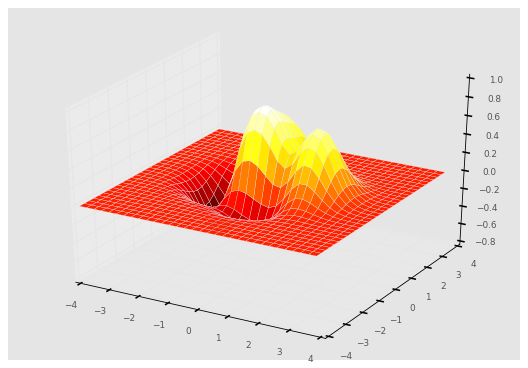

In [73]:
from mpl_toolkits.mplot3d import Axes3D
def f(x,y): return (1-x/2 + x**5 + y**3)*np.exp(-x**2-y**2)  # 5차 & 3차 방정식. //  -로 점점 줄어든다
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25)    # 중앙이 0.0 거기에 +-4
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y) 
Z = np.sin(f(X,Y))
#
ax.plot_surface(X,Y,Z ,rstride = 1, cstride = 1, cmap = 'hot')
plt.show()

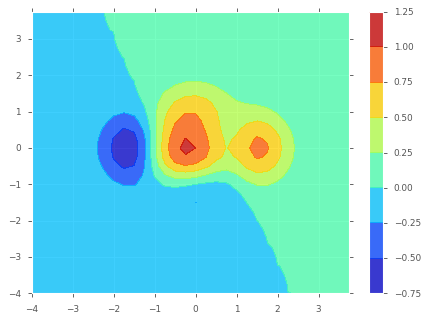

In [78]:
plt.contourf(X,Y,f(X,Y), 8,alpha = 0.75, cmap = 'jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


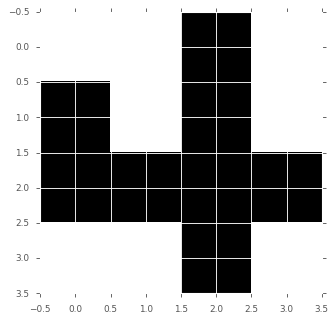

In [82]:
# interpolation : 보간법 ( 새로운 점을 만들기 위해 많은 점들을 평균화해서 만들기 )

a = [0,0,1,0,
    1,0,1,0,
    1,1,1,1,
    0,0,1,0]
np1 = np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4), cmap = 'Greys', interpolation = 'nearest')  # 컬러값이 지정되지 않은 점은 보간해서 적용하라. 
plt.show()

# 보간법 : 빨강이 지정된 점, 파랑이 지정된 점이 있는데 한 점이 색이 지정이 안되면 빨강파랑 섞어서(중간) 지정. 

<function matplotlib.pyplot.show(*args, **kw)>

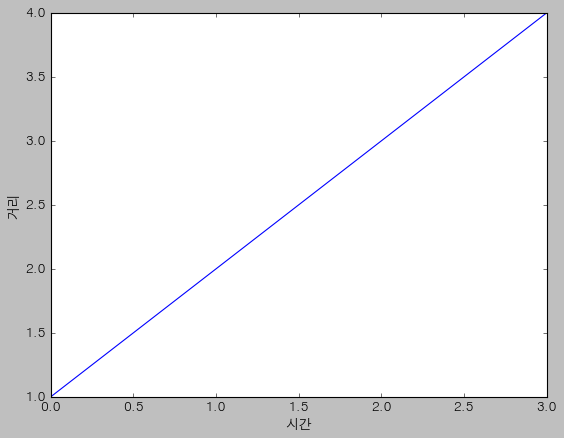

In [87]:
%matplotlib inline
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path = 'C:/Windows/Fonts/H2GTRM.TTF'   # d윈도우 모든 폰트가 있는곳
font_name = font_manager.FontProperties(fname = font_path).get_name()  # 폰트 이름 획득

# resource configuration  폰트이름
matplotlib.rc('font', family = font_name)
plt.plot([1,2,3,4])
plt.xlabel("시간")
plt.ylabel("거리")
plt.show

# 다시보기

[  19    1   11  -71  -38 -115  -24 -119 -165 -179 -265 -198 -193 -277
 -248 -269 -194 -261 -300 -299 -200 -254 -223 -312 -368 -413 -421 -366
 -430 -391 -416 -484 -530 -577 -586 -652 -606 -554 -542 -522 -598 -633
 -716 -719 -660 -622 -595 -640 -627 -551]


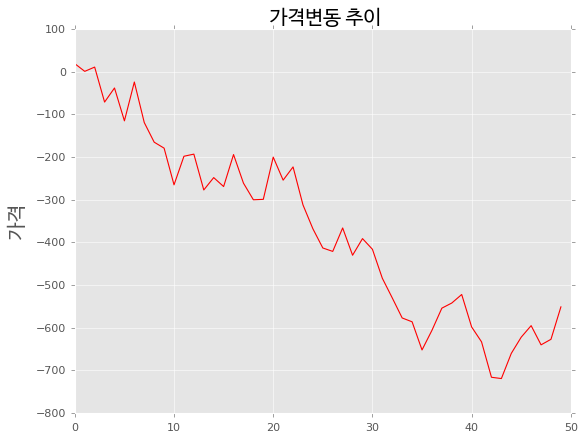

In [97]:
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
data = np.random.randint(-100,100,50).cumsum()   #cumsum => 행 요소 내려가면서 누적합
print(data)
plt.plot(range(50), data, 'r')
plt.title(' 가격변동 추이', fontproperties=fontprop)
plt.ylabel(' 가격 ', fontproperties=fontprop)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.
findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.


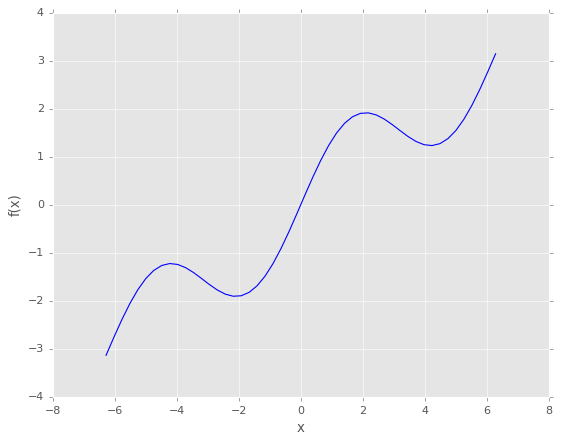

In [94]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = '바탕'
def f(x):  
    return np.sin(x) +0.5*x   # 주기함수
x = np.linspace(-2*np.pi, 2*np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show

In [ ]:
# 최소제곱법을 이용해서 fitting 적립

Text(0, 0.5, 'f(x)')

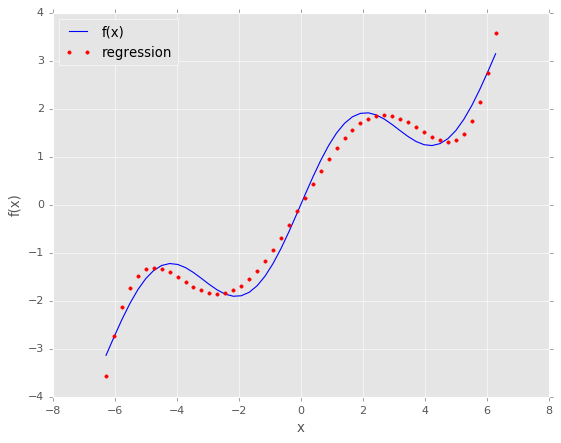

In [95]:
# polyfit 다차방정식으로 fitting(적합) : 계수를 찾아내는 것
reg = np.polyfit(x, f(x), deg = 5)   # 5차 방정식으로 피팅하라
ry = np.polyval(reg,x)

plt.plot(x, f(x), 'b', label = 'f(x)')   # 원본데이터
plt.plot(x,ry,'r.', label = 'regression')  # 최소제곱법으로 피팅
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# map

In [106]:
# 지리정보시스템
import folium
map_1 = folium.Map(location = [37.565711, 126.97809], zoom_start = 16) # 중심점
#                   titles = 'Stamen Terrain')
folium.Marker([37.565711, 126.97809], popup = '서울시청').add_to(map_1)
folium.Marker([37.565711, 126.97809], popup = '서울시청및', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
map_1

# HW : 서울 소재 10개 대학의 좌표를 출력해 보시오

In [ ]:
서울대 37.460031, 126.951911
한양대 37.566461, 127.044850
성균관대 37.588457, 126.993595
서강대 37.551225, 126.941013
연세대 37.565997, 126.938175
고려대 37.591046, 127.027885
중앙대 37.505318, 126.957112
이화여대 37.560003, 126.945469
경희대 37.596391, 127.052587
숙명대 37.546560, 126.964831

In [211]:
import folium
map_1 = folium.Map(location = [37.565711, 126.97809], zoom_start = 10) # 중심점
#                   titles = 'Stamen Terrain')
folium.Marker([37.460031, 126.951911], popup = '서울대').add_to(map_1)
folium.Marker([37.546560, 126.964831], popup = '숙명대').add_to(map_1)
folium.Marker([37.596391, 127.052587], popup = '경희대').add_to(map_1)
folium.Marker([37.560003, 126.945469], popup = '이화여대').add_to(map_1)
folium.Marker([37.505318, 126.957112], popup = '중앙대').add_to(map_1)
folium.Marker([37.591046, 127.027885], popup = '고려대').add_to(map_1)
folium.Marker([37.565997, 126.938175], popup = '연세대').add_to(map_1)
folium.Marker([37.551225, 126.941013], popup = '서강대').add_to(map_1)
folium.Marker([37.588457, 126.993595], popup = '성균관대').add_to(map_1)
folium.Marker([37.566461, 127.044850], popup = '한양대').add_to(map_1)
#folium.Marker([37.565711, 126.97809], popup = '서울시청및', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
map_1

# pandas

In [ ]:
# pandas : series, dataframe, panel
# numpy(상속) 방식의 인덱싱이 가능, + dict(중복을 허용, 순서를 보장)
# 열중심

In [107]:
import pandas as pd
data = {'a': 0., 'b':1., 'c':2.}  # dict
s = pd.Series(data)  # 1차원, 키가 인덱스로 변함
print(s['a'])  # 키이 인덱싱
s = pd.Series(data, index = ['b','c','d','a']) # 인덱스 순서 => 행이름
print(s['a'])
print(s['d']) # d 가 없으니까 nan(데이터가 없을때)
list(s)

# 인덱스 : 행
# pandas 는 열중심

0.0
0.0
nan


[1.0, 2.0, nan, 0.0]

In [108]:
s = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])  # 각 짝지어서 순서정렬
print('인덱스에 의한 출력', s[0]) # 1  => 순서에 의한 인덱스
print(s['a']) #1  => 키에 의한 인덱스
print(s[:3]) # numpy
print('음수', s[-3:])
s['a'] = 100
print(s['a'])
s['f'] = 10
print(s['f'])
print('filtering에 의한 출력', s[s>4])  # 4보다 큰 s 출력 , 인덱스 : boolean index (F,F,F,F,T 라서 만출력 -> 5, 10,100)
print(s)
print(s*2)

인덱스에 의한 출력 1
1
a    1
b    2
c    3
dtype: int64
음수 c    3
d    4
e    5
dtype: int64
100
10
filtering에 의한 출력 a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [115]:
data = np.array(['a','b','c','d'])  # ndarray
# range => list
# aragne => ndarray
# RangeIndex 객체가 자동으로 생성됨 => index (rangeindex : 순서가 있는 인덱스)
s = pd.Series(data)   # ndarray 를 이용해 시리즈 초기화
print('시리즈 데이터', s.values)  # 값만
print('시리즈 인덱스', s.index)  # RangeIndex(start = 0, stop=4, step = 1)
print('시리즈 초기화', s)
print('시리즈 인덱스의 값', s.index.values)
print(s[0])
print(s.head())  # 뒤는 tail()
print(s.value_counts()) # 도수 분포표 ( 갯수세기)
print(s.value_counts(normalize = True)) # 사이즈 1로 => 상대도수 분포표
print(s.describe()) # 설명(숫자변수에 대해서만) // freq : 도수
                    # 문자열 => object
    
print('데이터 타입은 : ',s.dtype)
print('차원', s.ndim)
print('차수', s.shape)

시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈 초기화 0    a
1    b
2    c
3    d
dtype: object
시리즈 인덱스의 값 [0 1 2 3]
a
0    a
1    b
2    c
3    d
dtype: object
b    1
c    1
d    1
a    1
dtype: int64
b    0.25
c    0.25
d    0.25
a    0.25
dtype: float64
count     4
unique    4
top       b
freq      1
dtype: object
데이터 타입은 :  object
차원 1
차수 (4,)


# dict

In [121]:
# dict
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
print(obj3)
print(obj3.shape) #4
states = ['Califonia', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index = states) #cali = nan(없으니까)
print(obj4)
print('시리즈 인덱스', obj3.index)  # index
print('시리즈 인덱스', obj4.index)  # index
print('null이 있는가', pd.isnull(obj4))  # 데이터가 null 인가 - null 일때 true
print("결측치가 있는가 ", pd.notnull(obj4)) # 위에랑 반대. 
print('객체 출력')
print('obj3을 출력합니다', obj3)
print('obj4니다',obj4)
print('연산결과를출력합니다', obj3 + obj4)  
# 원래는 짝이 맞지 않아서 연산이 되지 않은데 ( index가 다름 )
# 하지만 판다스는 짝이 맞지 않아도 연산이 가능 ( 짝이 없으면 nan )

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)
Califonia        NaN
Ohio         35000.0
Oregon       16000.0
Texas        71000.0
dtype: float64
시리즈 인덱스 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈 인덱스 Index(['Califonia', 'Ohio', 'Oregon', 'Texas'], dtype='object')
null이 있는가 Califonia     True
Ohio         False
Oregon       False
Texas        False
dtype: bool
결측치가 있는가  Califonia    False
Ohio          True
Oregon        True
Texas         True
dtype: bool
객체 출력
obj3을 출력합니다 Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
obj4니다 Califonia        NaN
Ohio         35000.0
Oregon       16000.0
Texas        71000.0
dtype: float64
연산결과를출력합니다 Califonia         NaN
Ohio          70000.0
Oregon        32000.0
Texas        142000.0
Utah              NaN
dtype: float64


In [123]:
s = pd.Series(['A','B','Aaba','Baca', np.nan, 'CABA','cat'])
s.str.count('a')  # a가 있는지 없는지 찾기

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

# KDE (Kernel Density Estimate)

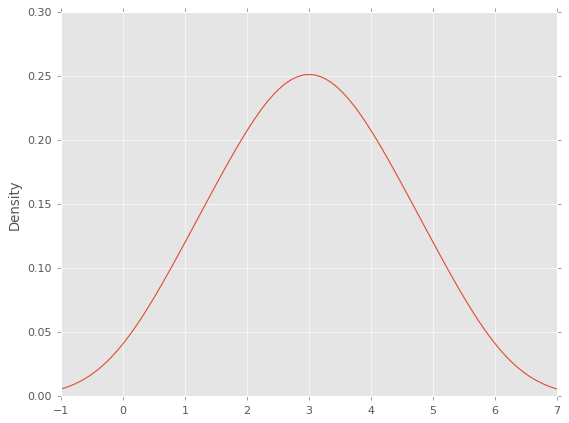

In [125]:
s = pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() # kernel density estimate
plt.show()

# 데이터는 7개 뿐인데 왜 곡선이 나오는가?
# 데이터가 없는 부분은 kernel 로 예측. 
# kernel은 가우시안 분포 

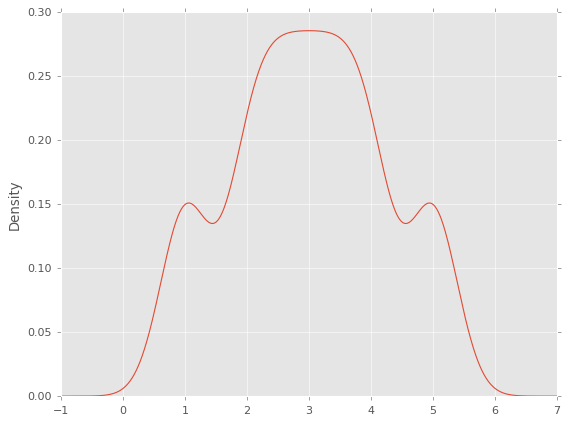

In [129]:
s.plot.kde(bw_method = 0.3)  # 과적합. bin width (조금씩 예측해서 좀더 세밀하고 깊게 -> 수치가 작을수록 굴곡이 더 많아짐)
plt.show()

# Dataframe

In [130]:
# dataframe
# 행인덱스와 열인덱스
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [132]:
data['area'] # 인덱싱 방법으로 접근
data.area   # . 방법으로 접근  (  같은 값 출력 )

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [133]:
# 객체비교  is None
data.area is data['area']

True

# 실시간 변수 추가

In [134]:
# 객체에서 변수를 실시간 추가하는 것 가능
# append

data['density'] = data['pop']/ data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [135]:
# 인덱스 없이 값만 출력
data.values
# ndarray => numpy 함수로 처리 (그래서 지수형으로 출력)

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [136]:
data.T  # 전치

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [137]:
data.values[0]  # 행값 (values)

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

# iloc  &  loc 

In [139]:
data.iloc[:3, :2]  # 행과 열로 입력  (integerlocation)

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [140]:
data.loc[:'Illinois', : 'pop']   # 순서보장?

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [141]:
data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [142]:
data['Florida' : 'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [143]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [145]:
df = pd.DataFrame(d)
print(df)
print('축', df.axes)
print('데이터 타입', df.dtypes)
print('데이터 타입', df.get_dtype_counts) # unique만 출력 (중복된것 말고 다 출력)
print('비었나', df.empty) # 데이터가 비어있으면 T, 아니면 F
print('차원', df.ndim)
print('차수', df.shape) # 8행, 3열
print('사이즈', df.size)
print('값', df.values)
print(df.head(2))
print(df.tail(2))


  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
데이터 타입 Name       object
Age       float64
Rating    float64
dtype: object
데이터 타입 <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>
비었나 False
차원 2
차수 (8, 3)
사이즈 24
값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [148]:
print('합계', df.sum())  # sum 의 조건을 주지 않아서 전체데이터의 sum 값 출력
print(df.mean())  # 숫자만 적용 (mean)

print(df.std())  # standard deviation 표준편차

print(df.describe())  # 숫자데이터만 적용 (describe)

print('오브젝트', df.describe(include = ['object']))  # include 하면 문자 데이터(object)도 출력

print(df.describe(include='all')) # unique, top, freq

합계 Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object
Age       25.857143
Rating     3.658571
dtype: float64
Age       2.734262
Rating    0.698628
dtype: float64
             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000
오브젝트        Name
count     8
unique    8
top     사하나
freq      1
       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     사하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


# 문제

In [168]:
data = {'state': ['경기', '강원','서울','충북','인천'], 'year':[2000, 2001,2002,2001,2002],
       'pop':[1.5,1.7,3.6,2.4,2.9]}
frame2 = pd.DataFrame(data, columns = ['year', 'state', 'pop','debt',],  # 열
                     index = ['one','two','three','four','five'])    # 행
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


In [175]:
# 1) state만 출력하시오
print(frame2['state'])
print(frame2.state)

# 2) debt 열을 추가하고모든 값을 16.5로 입력하시오
frame2['debt'] = 16.6
print('debt값 적용후', frame2)

# 3) debt 를 pd.Series([-1.2,-1.5,-1.7], index = ['two','four','five'])로 수정하시오
val = pd.Series([-1.2,-1.5,-1.7], index = ['two','four','five'])
frame2['debt'] = val


# 4) 파생변수 'estern'에 주소가 서울인가를 따져 서울은 True 아니면 False 가 입력되게 하시오
      #내가한거
      #data['estern'] = data['state']== '서울'
     #data['estern']

# 4번 답
frame2['estern'] = frame2.state == '서울'
frame2['estern']


# 삭제
del frame2['estern'] 

print(frame2['year']['one'])  #열이먼저
print(frame2.loc['one', 'year'])

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object
one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object
debt값 적용후        year state  pop  debt  estern
one    2000    경기  1.5  16.6   False
two    2001    강원  1.7  16.6   False
three  2002    서울  3.6  16.6    True
four   2001    충북  2.4  16.6   False
five   2002    인천  2.9  16.6   False
2000
2000


# 시간 함수

In [ ]:
# 시간 함수
# 리눅수 : timestamp 1970.1.1 이후로 검과된 mili초로 표현
# 내부적으로 데이터 저장시 timestamp
# pandas 에서는 nano초 까지 표현
# pandas 에서는  
#     시간인덱스 : 시계열 분석 : DateTimeIndex, PeriodIndex (주기값)
# python : time.time() : 2000.1.1  경과된 mili초로 표현
# datetime(날짜와 시간을 표현)

In [177]:
import time
print(time.time())  # 밀리초로 표현
print(time.localtime()) # 년월일 시분초
yesterday = time.localtime(time.time()-60*60*24)  # -(24시간 * 분 * 초 ): 하루전 # 시간연산
yesterday
print(yesterday)
time.strftime('%Y %m %d')  # 시간을 문자열로 변경 (스트링f time)

1578383542.624669
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=16, tm_min=52, tm_sec=22, tm_wday=1, tm_yday=7, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=16, tm_min=52, tm_sec=22, tm_wday=0, tm_yday=6, tm_isdst=0)


'2020 01 07'

In [178]:
from datetime import date, time, datetime, timedelta   # timedelta : 시간 차
now = datetime.now() # 년월일 시분초
print(now)
now.year, now.month, now.day
now.timestamp() # 시간을 다시 밀리초로 표현하려면 : timestamp

2020-01-07 16:55:41.419915


1578383741.419915

In [187]:
now_str = now.strftime('%Y-%m-%d %H:%M:%S') # 년원일 시분초 => 문자열
now_str

'2020-01-07 16:55:41'

In [186]:
datetime.strptime(now_str,'%Y-%m-%d %H:%M:%S' ) #2020-01-07 16:55:41 를  날짜형식으로 변환

datetime.datetime(2020, 1, 7, 16, 55, 41)

In [188]:
delta = datetime(2020,1,7) - datetime(1995,1,6,8,15)
print("시간차는 = ", delta, delta.days,delta.seconds)

시간차는 =  9131 days, 15:45:00 9131 56700


In [191]:
start = datetime(2019,1,7)
print(start + timedelta(12)) # 기본이 날짜    / 12일 을 더해라 => 19일
start + timedelta(hours = -5) # 5시간 전으로

2019-01-19 00:00:00


datetime.datetime(2019, 1, 6, 19, 0)

# pandas 시간

In [192]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687255, unit = 's'))

2020-01-07 17:07:24.570820
2017-03-01 00:00:00
2020-04-24 00:14:15


In [195]:
# DatetimeIndex 생성 : 행 :index, 열키 : columns
print( pd.date_range("11:00", "13:30", freq = "30min")) ;print()   # 11시분터 13시30분까지 30분 단위로
print("시간으로", pd.date_range("11:00","13:30", freq = "30min").time) ;print()  # .time : 그중에서 time(시간만) 빼겠다 
print(pd.date_range("11:00", "13:30", freq = "H")) # H : hour 시간단위

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00', '2020-01-07 13:30:00'],
              dtype='datetime64[ns]', freq='30T')

시간으로 [datetime.time(11, 0) datetime.time(11, 30) datetime.time(12, 0)
 datetime.time(12, 30) datetime.time(13, 0) datetime.time(13, 30)]

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 12:00:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='H')


In [200]:
# 지정된 시간은 DatetimeIndex 로 생성
print(pd.to_datetime(pd.Series(['Jul 31, 2019', '2010-01-10', None]))) # 
print(pd.to_datetime(['2005/11/23', '2010.12.31', None]))

0   2019-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]
DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)


In [197]:
print(pd.date_range('1/1/2017', periods=5)) # 일간격 : 기본주가는 날짜

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')


In [198]:
print(pd.date_range('1/1/2017', periods=5, freq = 'M'))

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


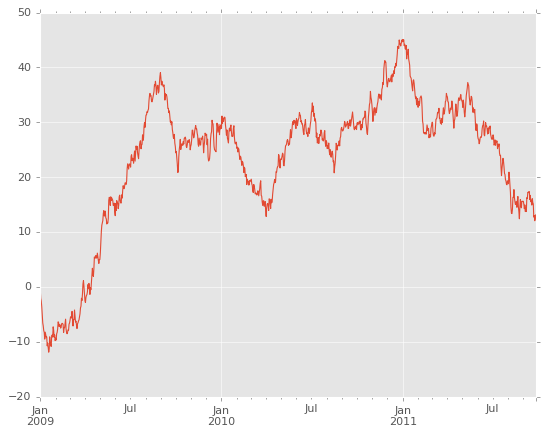

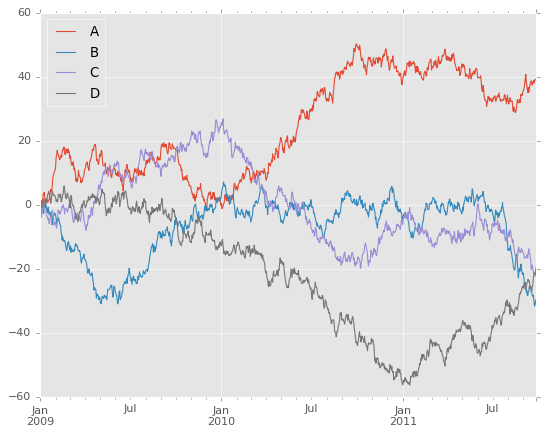

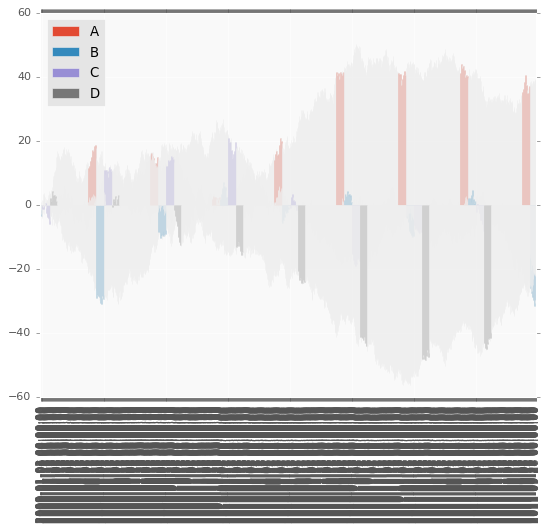

In [202]:
# 시계열(주식같은거 하면 좋음)
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2009', periods = 1000))
ts = ts.cumsum()  # 누적합
ts.plot()

df = pd.DataFrame(np.random.randn(1000,4), index= ts.index, columns = list('ABCD'))  
# ts에 있는 인덱스를 사용해라/ 4종목 (A,B,C,D)
df = df.cumsum()
df.plot()
df.plot.bar();

# 문제

In [ ]:
# 문제 다음 데이터를 데이터프레임에 저장하시요
#         지역  2018     2017 2016 2015 2015-2018 증가율
# 서울 수도권  9904312 9631482 9762546 9853972    0.0283
# 부산 경상권  3448737 3393191 3512547 3655437    0.0163
# 인천 수도권  2890451 2632035 2517680 2466338    0.0982
# 대구 경상권  2466052 2431774 2456016 2473990    0.0141 


#columns = ['지역', '2018', '2017','2016','2015','2015-2018 증가율']
#index = ['서울', '부산', '인천', '대구']

In [231]:
data = {'지역':['수도권', '경상권','수도권','경상권'], '2018':[9904312 , 3448737, 2890451, 2466052], 
        '2017': [9631482, 3393191, 2632035, 2431774], '2016':[9762546, 3512547, 2517680, 2456016], 
        '2015':[9853972, 3655437, 2466338, 2473990,], '2015-2018 증가율': [0.0283, 0.0163, 0.0982, 0.0141]}
df = pd.DataFrame(data, columns =['지역', '2018', '2017','2016','2015','2015-2018 증가율'], 
                  index = ['서울', '부산', '인천', '대구'] )
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [232]:
# 문제 : '2015-2018 증가율' 을 %로 변경하시오
df['2015-2018 증가율'] = df['2015-2018 증가율'] * 100
df


,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [233]:
# 문제 : 2015 - 2017의 증가율을 구해서 변수를 추가하시오
# (열이름 : "2015 - 2018 증가율")
df['2015-2017 증가율'] = (df['2017']- df['2015']) / df['2015']
df

# 증감율
# [(증가한 부분) / 증가하기 전] * 100 = %


,지역,2018,2017,2016,2015,2015-2018 증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-0.022579
부산,경상권,3448737,3393191,3512547,3655437,1.63,-0.071741
인천,수도권,2890451,2632035,2517680,2466338,9.82,0.067183
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.017064


In [ ]:
# 증감율
[(증가한 부분) / 증가하기 전] * 100 = %
